# A utilização do ChatGPT no ensino-aprendizagem dos alunos do ensino médio

# 1. Introdução

## 2. Carregando as bibliotecas

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import nltk

## 3. Importando os dados

In [36]:
students_data_path = '../dados/students_data.csv'
teachers_data_path = '../dados/teachers_data.csv'

students_data = pd.read_csv(students_data_path)
teachers_data = pd.read_csv(teachers_data_path)

### 3.1. Visualizando os dados dos alunos

In [37]:
students_data

,timestamp,age,gender,grade,tech_usage_frequency,ai_experience,chatgpt_usage,social_media_usage,chatgpt_study_frequency,chatgpt_learning_methods,chatgpt_help_performance,chatgpt_useful_subjects,chatgpt_easy_to_use,chatgpt_accessibility,chatgpt_concerns,chatgpt_limitations,social_media_influencers,chatgpt_improvement_suggestions,chatgpt_recommendation,chatgpt_additional_comments
0,2024-09-03 12:07:35.983,17,Feminino,3ª Série EM,Diariamente,Sim,Sim,Sim,Semanalmente,"Para tirar dúvidas sobre matérias escolares, P...","Sim, um pouco","Línguas (Português, Inglês, Espanhol), Geografia",Sim,Sim,Dependência excessiva da tecnologia,Respostas imprecisas ou erradas,Sim,Respostas educacionais verificadas!,Sim,"Muito útil, eu mesma treino inglês e tenho aul..."
1,2024-09-03 12:07:44.305,17,Masculino,3ª Série EM,Diariamente,Não,Sim,Sim,Mensalmente,"Para tirar dúvidas sobre matérias escolares, P...","Sim, muito","Ciências (Biologia, Química, Física), Línguas ...",Sim,Sim,Precisão das informações,Respostas imprecisas ou erradas,Sim,respostas mais precisas e verificadas,Sim,NaN
2,2024-09-03 12:07:51.589,17,Outro,3ª Série EM,Diariamente,Sim,Não,Sim,Nunca,nunca usei,"Não, não faz diferença","Matemática, Ciências (Biologia, Química, Físic...",Nunca utilizei,Sim,"Precisão das informações, Dependência excessiv...",Respostas imprecisas ou erradas,Sim,mais precisão nas respostas,Não,NaN
3,2024-09-03 12:08:11.225,18,Feminino,3ª Série EM,Mensalmente,Sim,Sim,Sim,Mensalmente,"Para tirar dúvidas sobre matérias escolares, P...","Sim, um pouco","Matemática, Ciências (Biologia, Química, Física)",Sim,Sim,Dependência excessiva da tecnologia,Respostas imprecisas ou erradas,Sim,acerto nas respostas!!! muitas falhas,Sim,"Ele costuma falhar um pouco, mas é um ótimo me..."
4,2024-09-03 12:08:22.095,17,Feminino,3ª Série EM,Diariamente,Sim,Sim,Sim,Mensalmente,"Para tirar dúvidas sobre matérias escolares, P...","Sim, um pouco","Matemática, Línguas (Português, Inglês, Espanhol)",Sim,Sim,"Precisão das informações, Dependência excessiv...",Respostas imprecisas ou erradas,Sim,Melhoria nas respostas,Sim,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2024-09-06 10:17:30.526,16,Masculino,2ª Série EM,Mensalmente,Sim,Sim,Sim,Raramente,"Para fazer pesquisas rápidas, Para ajuda com t...","Não, não faz diferença","Matemática, Ciências (Biologia, Química, Físic...",Sim,Sim,Dependência excessiva da tecnologia,Respostas imprecisas ou erradas,Sim,Ser mais preciso exato,Sim,Tinha que liberar a versão paga para os alunos.
85,2024-09-06 10:17:51.392,17,Feminino,2ª Série EM,Semanalmente,Sim,Sim,Sim,Raramente,"Para tirar dúvidas sobre matérias escolares, P...","Sim, um pouco","Matemática, Línguas (Português, Inglês, Espanh...",Sim,Não,"Precisão das informações, Dependência excessiv...",Respostas imprecisas ou erradas,Sim,Uma melhor verificação na veracidade das infor...,Sim,Acredito que essa inteligência artificial pode...
86,2024-09-06 10:21:44.017,16,Feminino,2ª Série EM,Diariamente,Não,Sim,Sim,Semanalmente,"Para tirar dúvidas sobre matérias escolares, P...","Sim, muito","Ciências (Biologia, Química, Física), Línguas ...",Sim,Não,"Precisão das informações, Dependência excessiv...",Respostas imprecisas ou erradas,Sim,"Que os professores estimulem mais o uso, pois ...",Sim,É uma forma rápida e acessível de ganhar infor...
87,2024-09-06 10:23:24.053,17,Feminino,2ª Série EM,Diariamente,Não,Não,Sim,Nunca,Eu não utilizo ele,"Não, não faz diferença","Eu não sei, não utilizo",Nunca utilizei,Não,"Precisão das informações, Dependência excessiv...","Acaba limitando o uso dó cérebro, cosas que er...",Sim,Não sei.,Sim,NaN


### 3.2. Visualizando os dados dos professores

In [38]:
teachers_data

,timestamp,teaching_area,experience_years,tech_usage_frequency,ai_experience,chatgpt_usage,chatgpt_frequency,chatgpt_teaching_methods_1,chatgpt_teaching_methods_2,chatgpt_help_performance,chatgpt_useful_subjects,chatgpt_easy_to_use,chatgpt_accessibility,chatgpt_concerns,chatgpt_limitations,chatgpt_improvement_suggestions,chatgpt_recommendation,chatgpt_additional_comments
0,2024-09-18 15:08:17.795,Matemática,Mais de 10 anos,Semanalmente,Sim,Sim,Mensalmente,Mensalmente,"Para preparar materiais didáticos, Para gerar ...","Sim, um pouco",Matemática,Sim,Não,Dependência excessiva da tecnologia,Respostas imprecisas ou erradas,Em matemática temos muitos erros de resolução.,Sim,Deveria ter mais formações para os professore...
1,2024-09-18 16:51:06.267,"Ciências (Biologia, Química, Física)",Mais de 10 anos,Mensalmente,Sim,Sim,Semanalmente,Semanalmente,"Para preparar materiais didáticos, Para aprimo...","Não, atrapalha",Nenhuma,Sim,Sim,"Precisão das informações, Dependência excessiv...","Respostas imprecisas ou erradas, Falta de inte...",A IA deveria ser usada como forma de aprimoram...,Sim,"Penso que a IA é benéfica e pode.ajudar muito,..."
2,2024-09-18 19:02:27.467,Geografia,1-5 anos,Diariamente,Não,Sim,Mensalmente,Mensalmente,"Para preparar materiais didáticos, Para gerar ...","Não, atrapalha","Em todas poderia ser bem utilizado, a questão ...",Sim,Sim,Dependência excessiva da tecnologia,Falta de interação humana,Deve ser ensinado aos estudantes formas colabo...,Sim,..
3,2024-09-18 19:16:08.149,"Ciências (Biologia, Química, Física)",Mais de 10 anos,Semanalmente,Sim,Sim,Mensalmente,Semanalmente,Para revisar conteúdos,"Não, atrapalha","Ciências (Biologia, Química, Física), Línguas ...",Sim,Sim,"Precisão das informações, Dependência excessiv...","Respostas imprecisas ou erradas, Dificuldade e...",Mais interação,Sim,Consulta rápida
4,2024-09-18 19:40:20.970,"Ciências (Biologia, Química, Física)",Mais de 10 anos,Diariamente,Sim,Não,Nunca,Raramente,Para gerar ideias de atividades e exercícios,"Sim, um pouco","Ciências (Biologia, Química, Física)",Sim,Não,Precisão das informações,Falta de interação humana,Não há,Não,Nao há
5,2024-09-18 19:56:52.680,"Línguas (Português, Inglês, Espanhol)",Mais de 10 anos,Semanalmente,Sim,Não,Nunca,Nunca,Ainda não usei,"Não, atrapalha","Não usei ainda, então não tenho opinião formada.",Nunca utilizei,Sim,"Dependência excessiva da tecnologia, Privacida...",Falta de interação humana,Não usei,Sim,"Tenho curiosidade, mas ainda não usei."
6,2024-09-18 20:01:30.569,Arte,Mais de 10 anos,Diariamente,Sim,Sim,Semanalmente,Semanalmente,Para aprimorar o conhecimento em tópicos espec...,"Sim, um pouco","Línguas (Português, Inglês, Espanhol)",Sim,Sim,Precisão das informações,Respostas imprecisas ou erradas,"Para tirar dúvidas, correções de texto",Sim,"Uma ferramenta nova, que devemos ter cuidado c..."
7,2024-09-18 21:27:14.931,"Línguas (Português, Inglês, Espanhol)",Mais de 10 anos,Semanalmente,Não,Não,Nunca,Nunca,Não uso.,"Não, atrapalha",Todas,Nunca utilizei,Sim,"Dependência excessiva da tecnologia,",Respostas imprecisas ou erradas,Mediação humana.,Não,Preocupo-me com a facilitação exagerada.
8,2024-09-19 09:09:10.760,"Línguas (Português, Inglês, Espanhol)",Mais de 10 anos,Diariamente,Sim,Sim,Mensalmente,Raramente,Para preparar materiais didáticos,"Não, atrapalha",Nao se aplica.,Sim,Sim,"Dependência excessiva da tecnologia, Limitar a...",Dificuldade em entender perguntas complexas,"Para o professor, preparo de atividades, econ...",Sim,"Para os alunos, considero que limitaria o raci..."
9,2024-09-20 14:20:16.539,Gestão,Mais de 10 anos,Mensalmente,Sim,Sim,Mensalmente,Mensalmente,"Para preparar materiais didáticos, Para gerar ...","Não, atrapalha","Geografia, Getão",Sim,Não,Dependência excessiva da tecnologia,Preconceito e falta de preparo de docente e di...,Trabalhar a conscientização dos usuários,Sim,Uma ferramenta importante que seve ser aplicad...


## 4. Análise Univariada

Dimensões do dataset de estudantes: (89, 20)
Dimensões do dataset de professores: (10, 18)

Tipos de dados (Estudantes):
timestamp                          object
age                                 int64
gender                             object
grade                              object
tech_usage_frequency               object
ai_experience                      object
chatgpt_usage                      object
social_media_usage                 object
chatgpt_study_frequency            object
chatgpt_learning_methods           object
chatgpt_help_performance           object
chatgpt_useful_subjects            object
chatgpt_easy_to_use                object
chatgpt_accessibility              object
chatgpt_concerns                   object
chatgpt_limitations                object
social_media_influencers           object
chatgpt_improvement_suggestions    object
chatgpt_recommendation             object
chatgpt_additional_comments        object
dtype: object

Tipos de dados (Professo

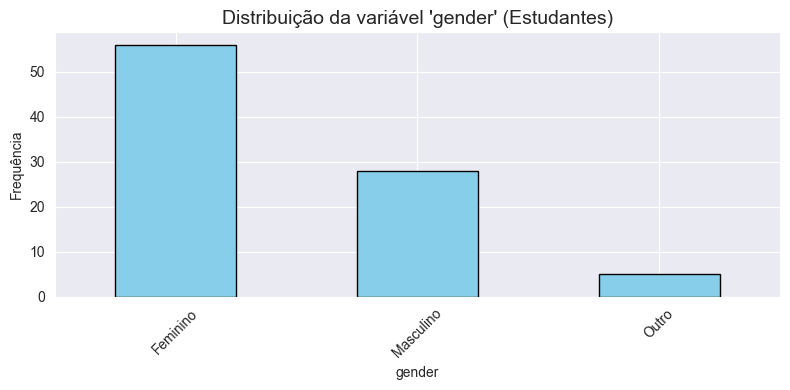

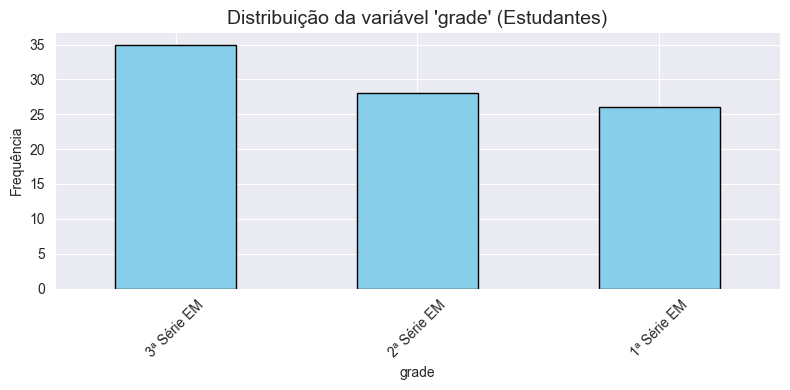

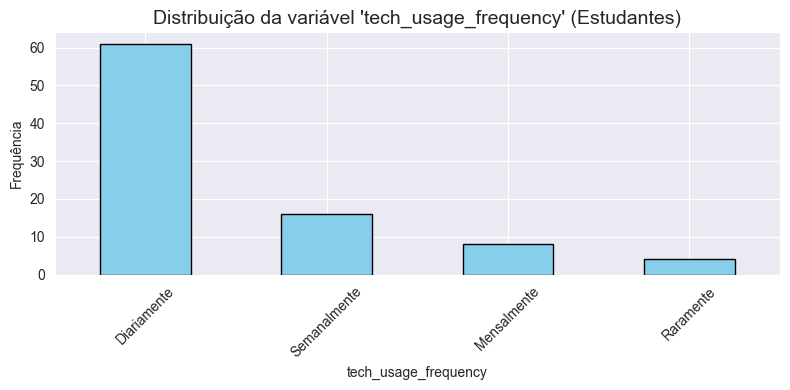

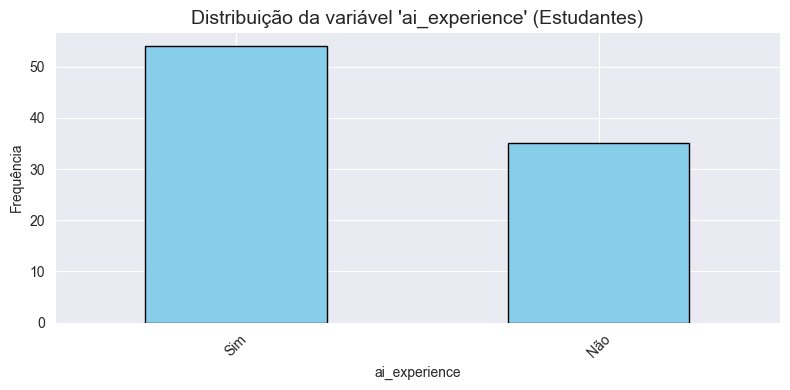

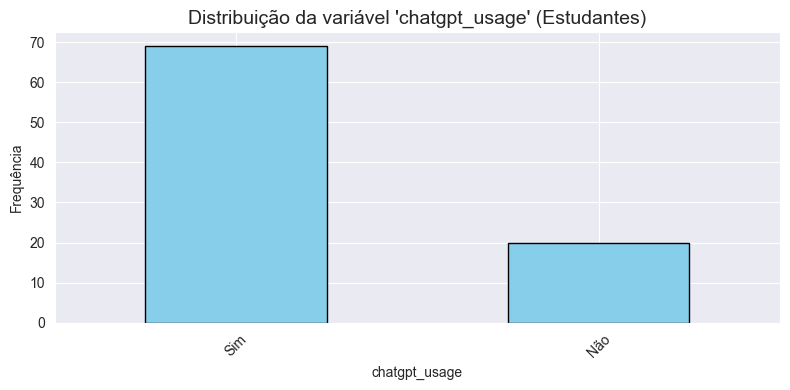

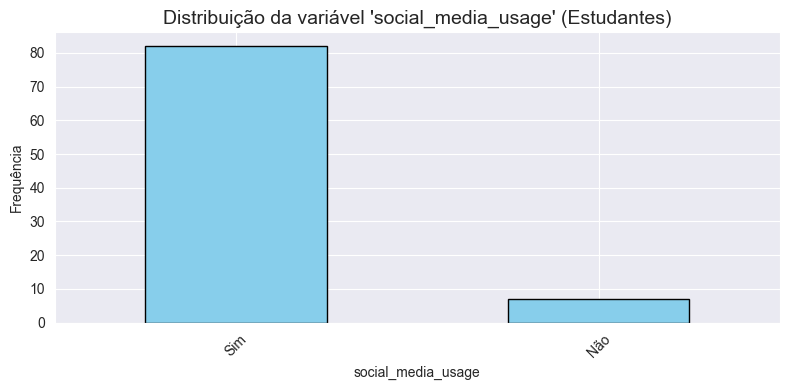

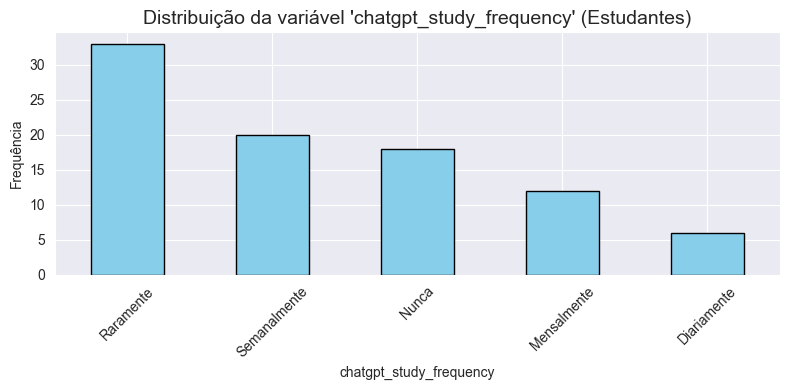

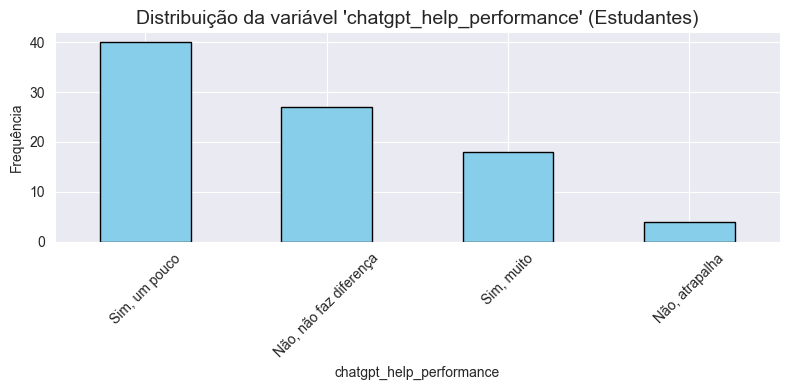

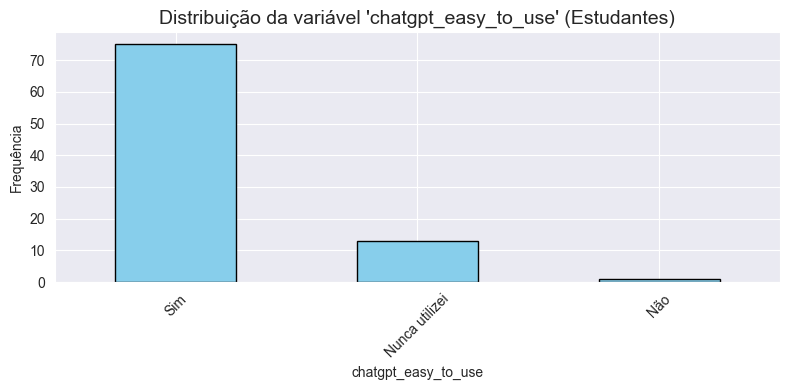

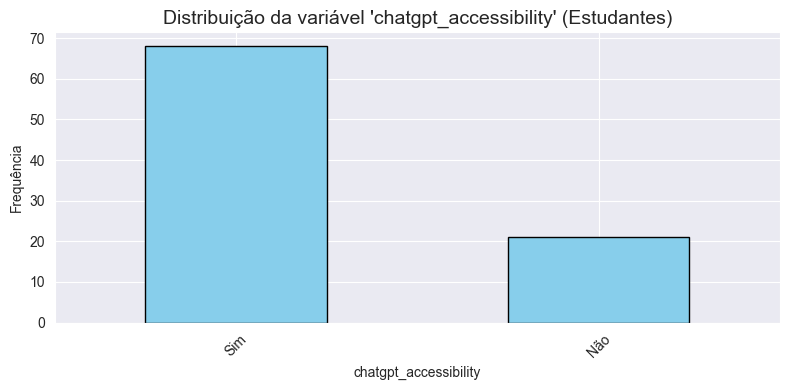

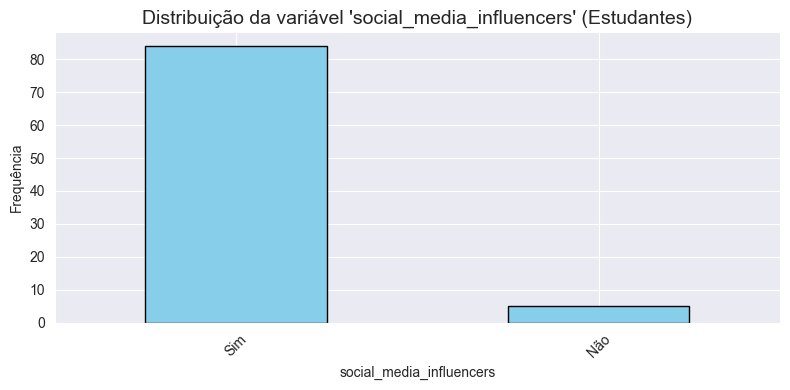

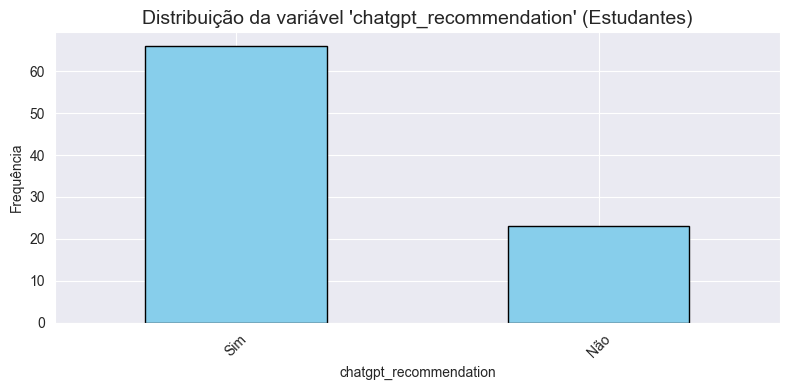

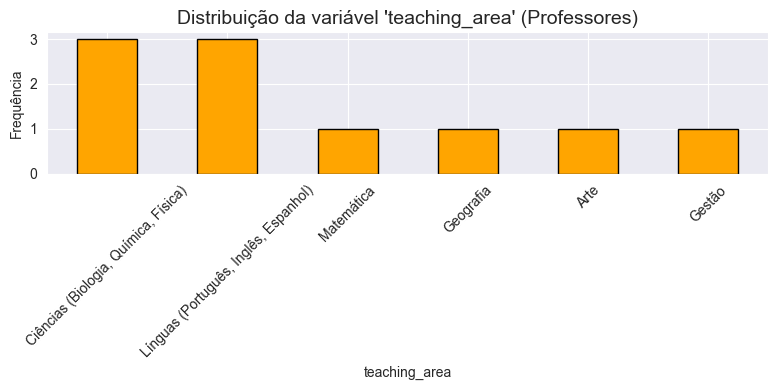

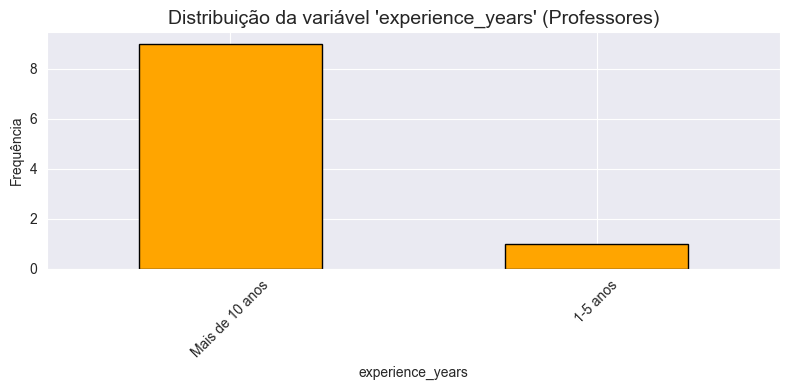

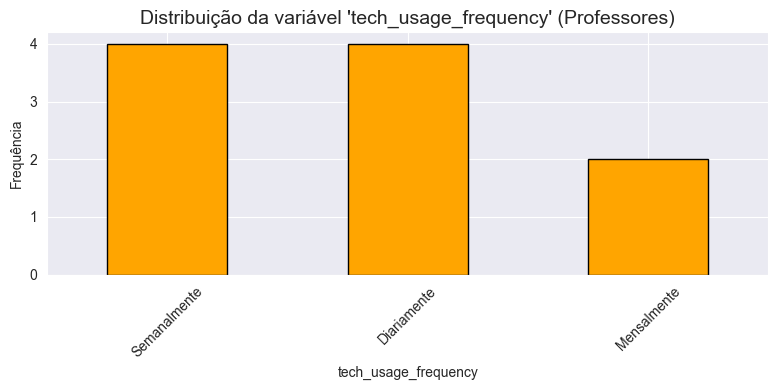

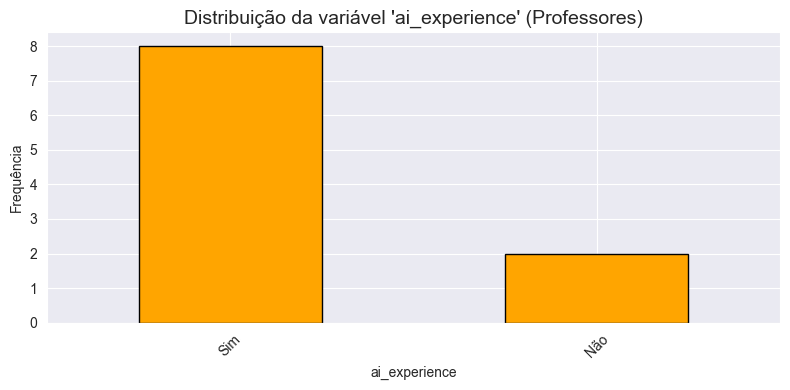

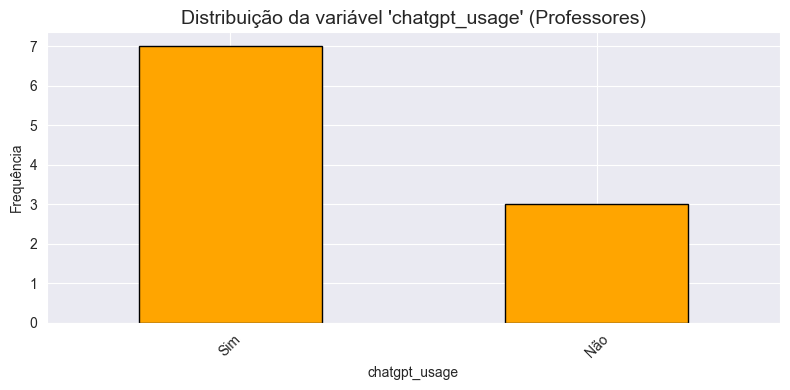

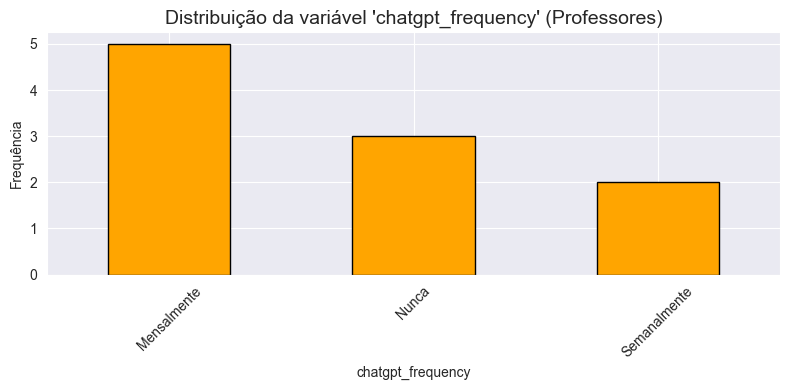

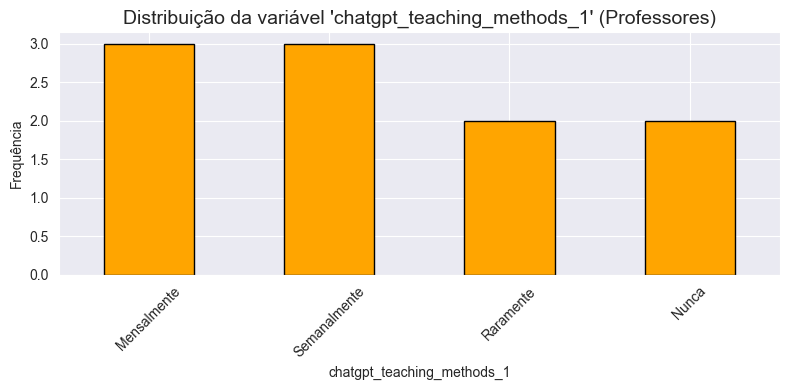

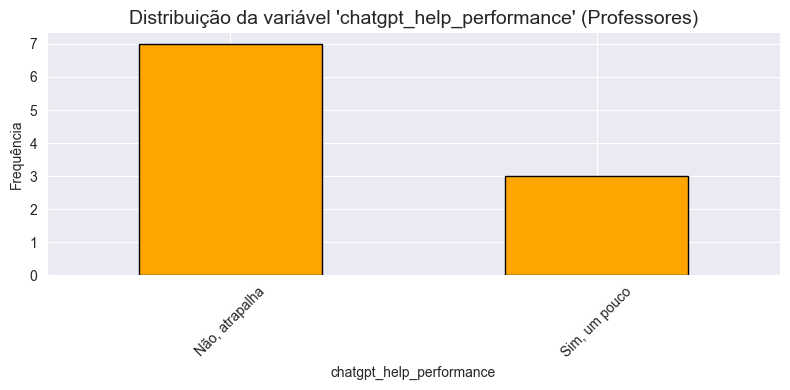

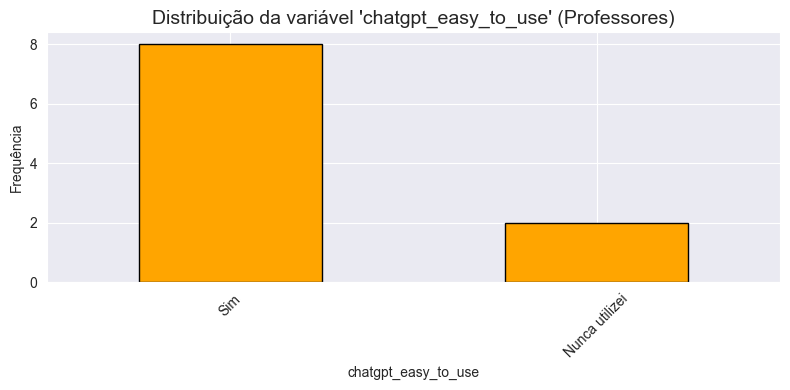

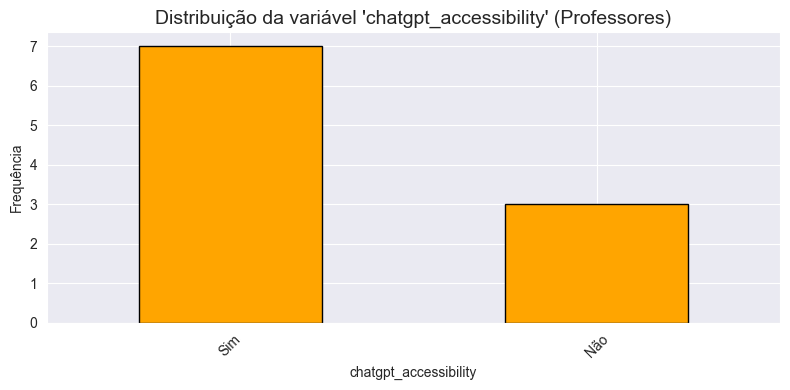

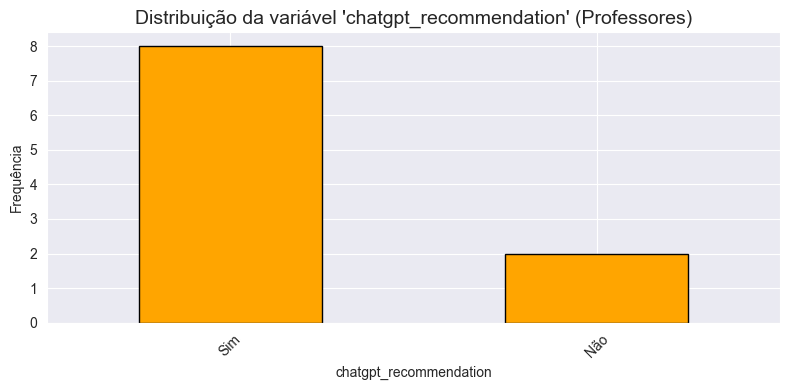


Estatísticas descritivas (Estudantes):
             age
count  89.000000
mean   16.370787
std     0.933980
min    15.000000
25%    16.000000
50%    17.000000
75%    17.000000
max    18.000000


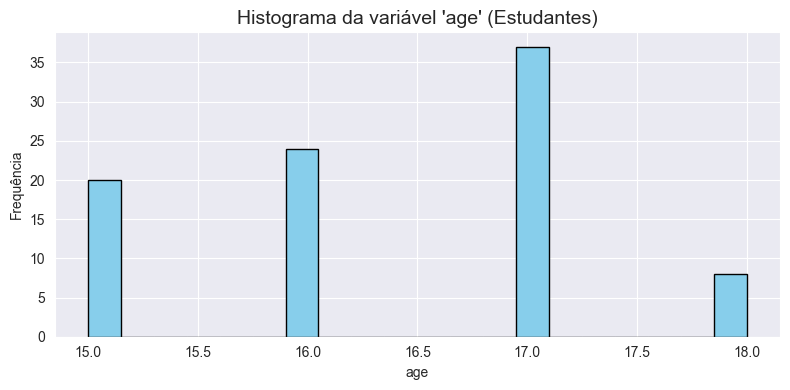


Nenhuma variável numérica encontrada no dataset de Professores.


In [39]:
# Função para identificar variáveis categóricas válidas (não são respostas abertas)
def is_valid_categorical(series, threshold=20):
    """
    Considerar categórica válida se tiver menos que `threshold` categorias únicas
    e não for um campo claramente textual (como chatgpt_concerns ou chatgpt_limitations).
    """
    unique_count = series.nunique()
    return unique_count < threshold and series.name not in ['chatgpt_concerns', 'chatgpt_limitations', 'timestamp', 'chatgpt_teaching_methods_2', 'chatgpt_useful_subjects', 'chatgpt_improvement_suggestions', 'chatgpt_additional_comments']

# Passo 1: Resumo Geral
print("Dimensões do dataset de estudantes:", students_data.shape)
print("Dimensões do dataset de professores:", teachers_data.shape)

print("\nTipos de dados (Estudantes):")
print(students_data.dtypes)

print("\nTipos de dados (Professores):")
print(teachers_data.dtypes)

# Valores ausentes
print("\nValores ausentes (Estudantes):")
print(students_data.isnull().sum())

print("\nValores ausentes (Professores):")
print(teachers_data.isnull().sum())

# Passo 2: Análise Univariada
# Variáveis categóricas válidas (Estudantes)
categorical_columns_students = [
    col for col in students_data.select_dtypes(include=['object', 'category']).columns
    if is_valid_categorical(students_data[col])
]

for col in categorical_columns_students:
    plt.figure(figsize=(8, 4))
    students_data[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribuição da variável '{col}' (Estudantes)", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Variáveis categóricas válidas (Professores)
categorical_columns_teachers = [
    col for col in teachers_data.select_dtypes(include=['object', 'category']).columns
    if is_valid_categorical(teachers_data[col])
]

for col in categorical_columns_teachers:
    plt.figure(figsize=(8, 4))
    teachers_data[col].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f"Distribuição da variável '{col}' (Professores)", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Variáveis numéricas
numerical_columns_students = [
    col for col in students_data.select_dtypes(include=['int64', 'float64']).columns if col != 'timestamp'
]
numerical_columns_teachers = [
    col for col in teachers_data.select_dtypes(include=['int64', 'float64']).columns if col != 'timestamp'
]

# Estatísticas descritivas e histogramas (Estudantes)
if numerical_columns_students:
    print("\nEstatísticas descritivas (Estudantes):")
    print(students_data[numerical_columns_students].describe())

    for col in numerical_columns_students:
        plt.figure(figsize=(8, 4))
        students_data[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Histograma da variável '{col}' (Estudantes)", fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.tight_layout()
        plt.show()
else:
    print("\nNenhuma variável numérica encontrada no dataset de Estudantes.")

# Estatísticas descritivas e histogramas (Professores)
if numerical_columns_teachers:
    print("\nEstatísticas descritivas (Professores):")
    print(teachers_data[numerical_columns_teachers].describe())

    for col in numerical_columns_teachers:
        plt.figure(figsize=(8, 4))
        teachers_data[col].plot(kind='hist', bins=20, color='orange', edgecolor='black')
        plt.title(f"Histograma da variável '{col}' (Professores)", fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.tight_layout()
        plt.show()
else:
    print("\nNenhuma variável numérica encontrada no dataset de Professores.")

## 5 Análise Univariada dos dados dos estudantes (Dados que necessitavam ser limpos)

### 5.1. Métodos de utilização do ChatGPT

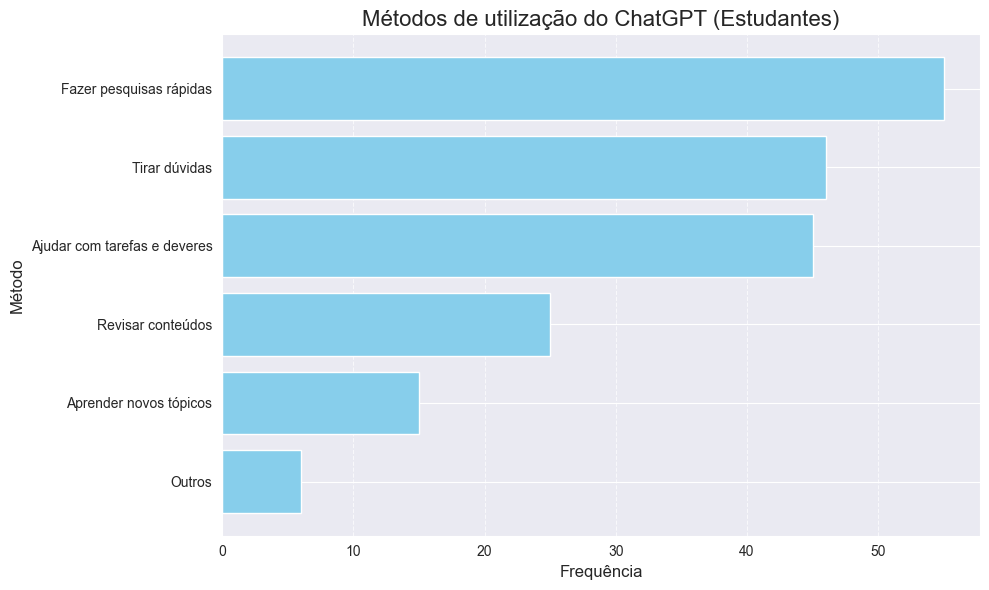

In [40]:
# Normalizar e limpar os dados
def normalize_methods(method):
    method = method.lower().strip()  # Converter para minúsculas e remover espaços extras
    if "não uso" in method or "nunca usei" in method or "não utilizo" in method:
        return None  # Ignorar respostas que indicam não uso
    elif "dúvidas" in method:
        return "Tirar dúvidas"
    elif "revisar" in method:
        return "Revisar conteúdos"
    elif "tarefas" in method or "deveres" in method:
        return "Ajudar com tarefas e deveres"
    elif "pesquisas" in method:
        return "Fazer pesquisas rápidas"
    elif "novos tópicos" in method:
        return "Aprender novos tópicos"
    else:
        return "Outros"

# Aplicar normalização nos métodos
cleaned_methods = students_data['chatgpt_learning_methods'].dropna().str.split(', ').sum()
normalized_methods = [normalize_methods(method) for method in cleaned_methods if normalize_methods(method)]

# Contar os métodos normalizados
method_counts_cleaned = Counter(normalized_methods)

# Converter para DataFrame
methods_cleaned_df = pd.DataFrame(method_counts_cleaned.items(), columns=['Método', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Plotar o gráfico limpo
plt.figure(figsize=(10, 6))
plt.barh(methods_cleaned_df['Método'], methods_cleaned_df['Frequência'], color='skyblue')
plt.title('Métodos de utilização do ChatGPT (Estudantes)', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Método', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 5.2. Matérias mais beneficiadas pelo uso do ChatGPT

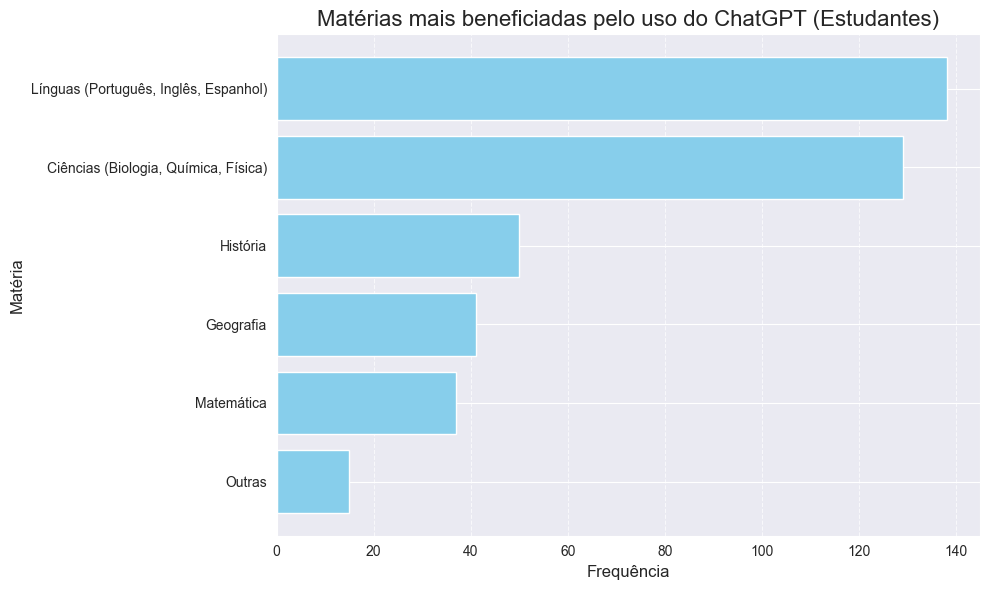

In [41]:
# Normalizar e limpar os dados de matérias
def normalize_subjects(subject):
    subject = subject.lower().strip()  # Converter para minúsculas e remover espaços extras
    if "matemática" in subject:
        return "Matemática"
    elif "línguas" in subject or "português" in subject or "inglês" in subject or "espanhol" in subject:
        return "Línguas (Português, Inglês, Espanhol)"
    elif "ciências" in subject or "biologia" in subject or "química" in subject or "física" in subject:
        return "Ciências (Biologia, Química, Física)"
    elif "geografia" in subject:
        return "Geografia"
    elif "história" in subject:
        return "História"
    else:
        return "Outras"

# Aplicar a normalização nos dados
cleaned_subjects = students_data['chatgpt_useful_subjects'].dropna().str.split(', ').sum()
normalized_subjects = [normalize_subjects(subject) for subject in cleaned_subjects]

# Contar as matérias normalizadas
subject_counts = Counter(normalized_subjects)

# Converter para DataFrame para visualização
subjects_df = pd.DataFrame(subject_counts.items(), columns=['Matéria', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.barh(subjects_df['Matéria'], subjects_df['Frequência'], color='skyblue')
plt.title('Matérias mais beneficiadas pelo uso do ChatGPT (Estudantes)', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Matéria', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 5.3. Preocupações dos estudantes ao utilizar o ChatGPT

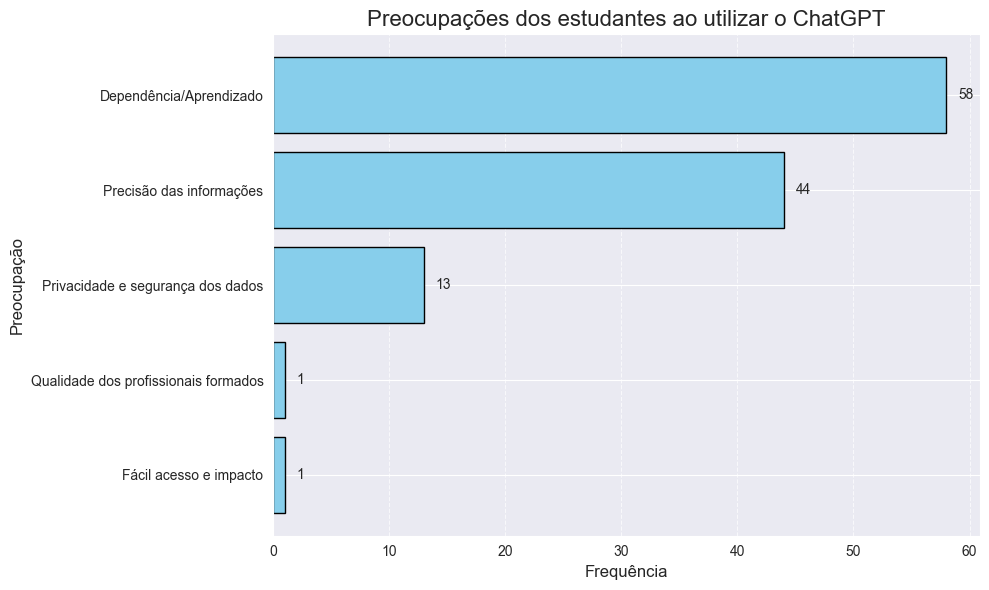

In [42]:
# Processar a coluna de preocupações
concerns = students_data['chatgpt_concerns'].dropna().str.split(', ').sum()

# Categorizar preocupações manualmente
def categorize_concern(concern):
    concern = concern.lower()
    if "dependência" in concern or "não aprendem" in concern:
        return "Dependência/Aprendizado"
    elif "precisão" in concern or "erro" in concern:
        return "Precisão das informações"
    elif "privacidade" in concern or "segurança" in concern:
        return "Privacidade e segurança dos dados"
    elif "profissionais formados" in concern:
        return "Qualidade dos profissionais formados"
    elif "fácil acesso" in concern:
        return "Fácil acesso e impacto"
    else:
        return None  # Ignorar termos irrelevantes

# Aplicar categorização
categorized_concerns = [categorize_concern(concern) for concern in concerns if categorize_concern(concern)]

# Contar a frequência das categorias
concerns_counter = Counter(categorized_concerns)

# Criar um DataFrame para visualização
concerns_df = pd.DataFrame(concerns_counter.items(), columns=['Preocupação', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Plotar o gráfico de barras aprimorado
plt.figure(figsize=(10, 6))
bars = plt.barh(concerns_df['Preocupação'], concerns_df['Frequência'], color='skyblue', edgecolor='black')
plt.title('Preocupações dos estudantes ao utilizar o ChatGPT', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Preocupação', fontsize=12)
plt.gca().invert_yaxis()  # Colocar as preocupações mais frequentes no topo

# Adicionar os valores sobre as barras
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())), va='center', fontsize=10)

# Estilizar grade e layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 5.4. Limitações percebidas pelos estudantes ao utilizar o ChatGPT

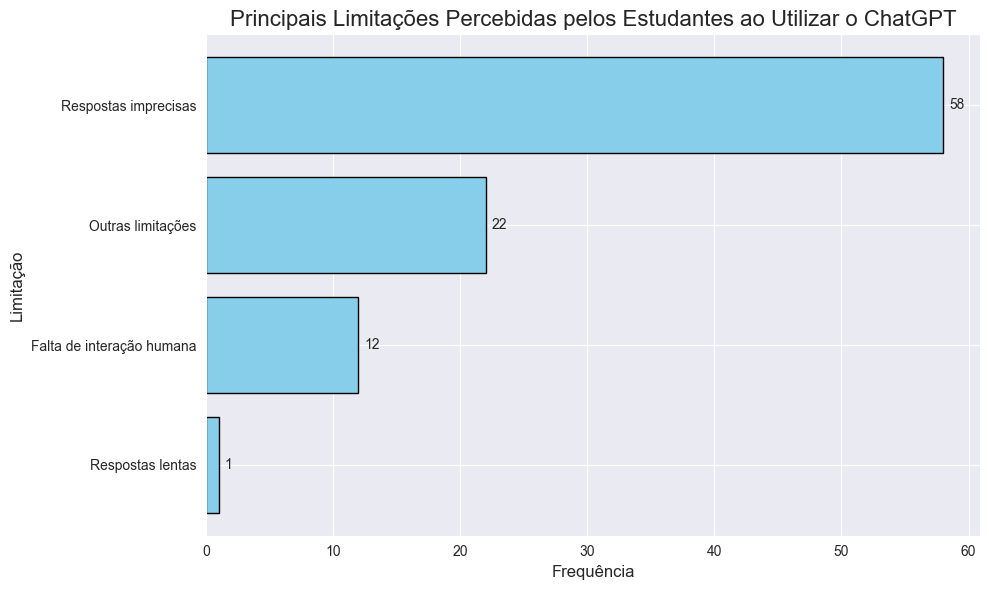

In [43]:
# Passo 1: Pré-processamento
# Remover valores nulos e dividir respostas compostas
limitations = students_data['chatgpt_limitations'].dropna().str.split(', ').sum()

# Passo 2: Categorizar as limitações
def categorize_limitation(limitation):
    limitation = limitation.lower()
    if "interação" in limitation or "humana" in limitation:
        return "Falta de interação humana"
    elif "imprecisa" in limitation or "erro" in limitation or "precisão" in limitation:
        return "Respostas imprecisas"
    elif "privacidade" in limitation or "segurança" in limitation:
        return "Privacidade e segurança"
    elif "adaptado" in limitation or "educacional" in limitation:
        return "Pouca adaptação educacional"
    elif "tempo" in limitation or "lento" in limitation:
        return "Respostas lentas"
    else:
        return "Outras limitações"

# Aplicar categorização
categorized_limitations = [categorize_limitation(limitation) for limitation in limitations]

# Passo 3: Contar a frequência das categorias
limitations_counter = Counter(categorized_limitations)

# Criar um DataFrame para visualização
limitations_df = pd.DataFrame(limitations_counter.items(), columns=['Limitação', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Passo 4: Visualizar os resultados
plt.figure(figsize=(10, 6))
bars = plt.barh(limitations_df['Limitação'], limitations_df['Frequência'], color='skyblue', edgecolor='black')
plt.title('Principais limitações percebidas pelos estudantes ao utilizar o ChatGPT', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Limitação', fontsize=12)
plt.gca().invert_yaxis()  # Inverter para que a categoria mais frequente apareça no topo

# Adicionar rótulos com os valores sobre as barras
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 6. Análise Bivariada dos dados dos estudantes

### 6.1 Relação entre frequência de uso e impacto percebido no desempenho escolar

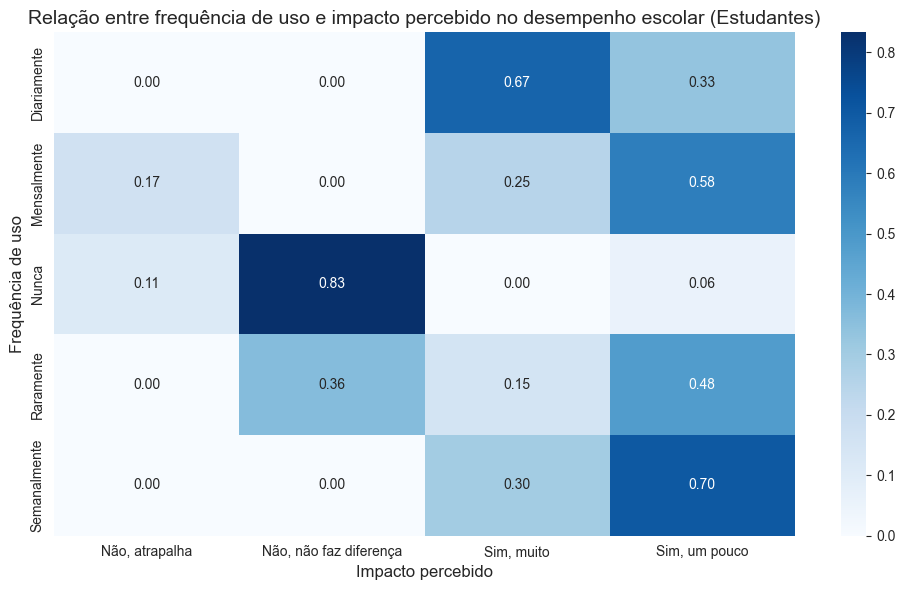

In [44]:
# Criar uma tabela cruzada entre frequência de uso e impacto percebido
impact_frequency_crosstab = pd.crosstab(
    students_data['chatgpt_study_frequency'],
    students_data['chatgpt_help_performance']
)

# Normalizar os dados para calcular proporções
impact_frequency_normalized = impact_frequency_crosstab.div(impact_frequency_crosstab.sum(axis=1), axis=0)

# Plotar um gráfico de calor (heatmap) para visualizar a relação
plt.figure(figsize=(10, 6))
sns.heatmap(
    impact_frequency_normalized,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar=True
)
plt.title('Relação entre frequência de uso e impacto percebido no desempenho escolar (Estudantes)', fontsize=14)
plt.xlabel('Impacto percebido', fontsize=12)
plt.ylabel('Frequência de uso', fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 7. Análise Univariada dos dados dos professores (Dados que necessitavam ser limpos)

### 7.1. Métodos de utilização do ChatGPT

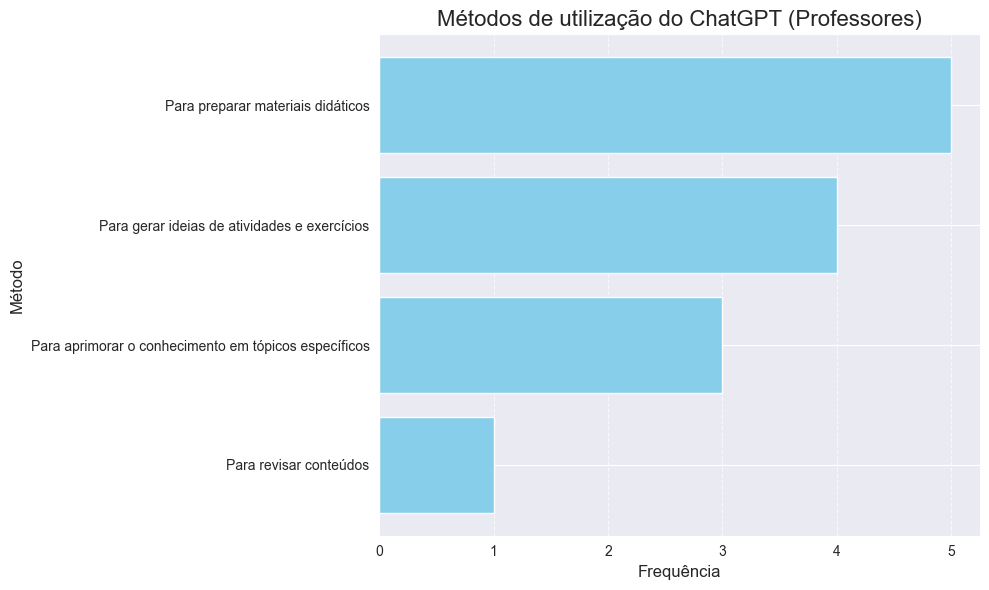

In [45]:
# Função para separar e normalizar métodos
def normalize_teaching_methods(method):
    if "não usei" in method.lower() or "não uso" in method.lower():
        return None  # Ignorar respostas irrelevantes
    methods = method.split(', ')  # Separar métodos múltiplos
    return [m.strip() for m in methods]

# Processar os métodos de ensino
cleaned_methods = teachers_data['chatgpt_teaching_methods_2'].dropna().apply(normalize_teaching_methods).dropna()
flat_methods = [method for methods_list in cleaned_methods for method in methods_list]  # Flatten a lista

# Contar os métodos normalizados
teaching_method_counts_cleaned = Counter(flat_methods)

# Converter para DataFrame
teaching_methods_cleaned_df = pd.DataFrame(teaching_method_counts_cleaned.items(), columns=['Método', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.barh(teaching_methods_cleaned_df['Método'], teaching_methods_cleaned_df['Frequência'], color='skyblue')
plt.title('Métodos de utilização do ChatGPT (Professores)', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Método', fontsize=12)
plt.gca().invert_yaxis()  # Inverter ordem para colocar os mais frequentes no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 7.2. Limitações percebidas pelos professores ao utilizar o ChatGPT

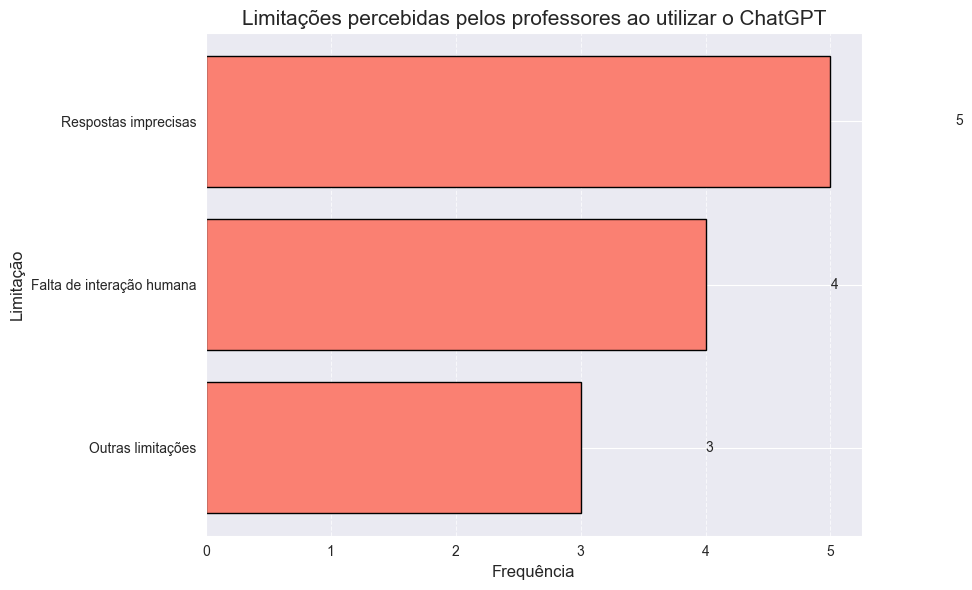

In [46]:
# Selecionar a coluna de limitações percebidas pelos professores
limitations = teachers_data['chatgpt_limitations'].dropna().str.split(', ').sum()

# Categorizar limitações manualmente
def categorize_limitation(limitation):
    limitation = limitation.lower()
    if "interação" in limitation or "humana" in limitation:
        return "Falta de interação humana"
    elif "imprecisa" in limitation or "erro" in limitation or "precisão" in limitation:
        return "Respostas imprecisas"
    elif "dados" in limitation or "privacidade" in limitation or "segurança" in limitation:
        return "Privacidade e segurança dos dados"
    elif "confiança" in limitation or "credibilidade" in limitation:
        return "Falta de confiança nas respostas"
    elif "não adaptado" in limitation or "adaptado" in limitation:
        return "Pouca adaptação a contextos educacionais"
    else:
        return "Outras limitações"

# Aplicar categorização
categorized_limitations = [categorize_limitation(limitation) for limitation in limitations]

# Contar a frequência das categorias
limitations_counter = Counter(categorized_limitations)

# Criar um DataFrame para visualização
limitations_df = pd.DataFrame(limitations_counter.items(), columns=['Limitação', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(limitations_df['Limitação'], limitations_df['Frequência'], color='salmon', edgecolor='black')
plt.title('Limitações percebidas pelos professores ao utilizar o ChatGPT', fontsize=15)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Limitação', fontsize=12)
plt.gca().invert_yaxis()  # Colocar as limitações mais frequentes no topo

# Adicionar os valores sobre as barras
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())), va='center', fontsize=10)

# Estilizar grade e layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 7.3. Matérias mais beneficiadas pelo uso do ChatGPT

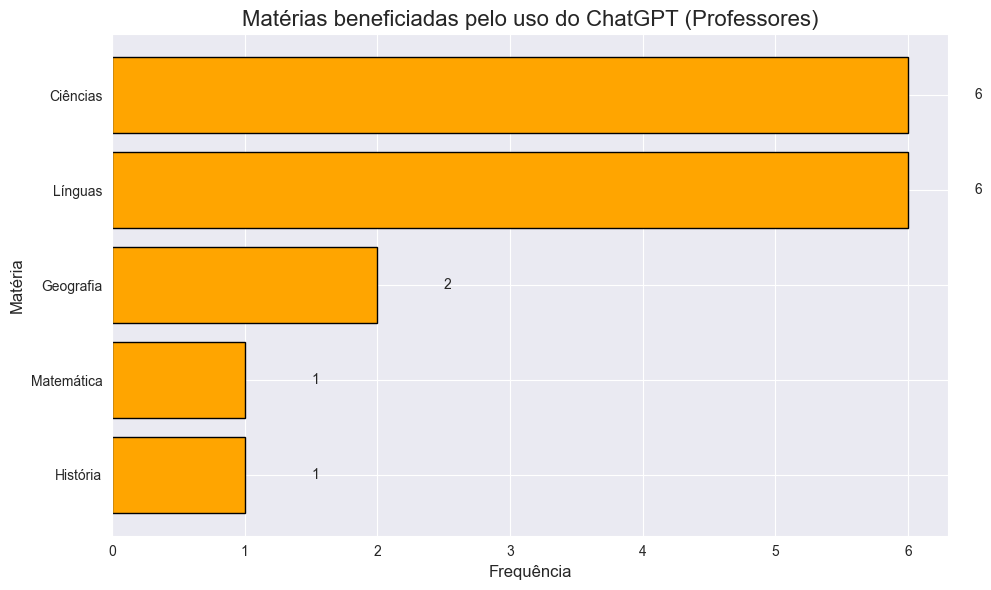

In [47]:
# Passo 1: Pré-processamento
# Remover valores nulos e dividir respostas compostas
subjects = teachers_data['chatgpt_useful_subjects'].dropna().str.split(', ').sum()

# Passo 2: Agrupar em categorias
def categorize_subject(subject):
  subject = subject.lower()
  if "matemática" in subject:
    return "Matemática"
  elif "física" in subject or "química" in subject or "biologia" in subject:
    return "Ciências"
  elif "língua" in subject or "inglês" in subject or "português" in subject or "espanhol" in subject:
    return "Línguas"
  elif "história" in subject:
    return "História"
  elif "geografia" in subject:
    return "Geografia"

# Aplicar categorização e filtrar valores válidos
categorized_subjects = [categorize_subject(subject) for subject in subjects if categorize_subject(subject) is not None]

# Passo 3: Contar a frequência de categorias
subjects_counter = Counter(categorized_subjects)

# Criar um DataFrame para visualização
subjects_df = pd.DataFrame(subjects_counter.items(), columns=['Matéria', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Passo 4: Visualizar os resultados
plt.figure(figsize=(10, 6))
bars = plt.barh(subjects_df['Matéria'], subjects_df['Frequência'], color='orange', edgecolor='black')
plt.title('Matérias beneficiadas pelo uso do ChatGPT (Professores)', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Matéria', fontsize=12)
plt.gca().invert_yaxis()  # Inverter para que a categoria mais frequente apareça no topo

# Adicionar rótulos com os valores sobre as barras
for bar in bars:
  plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), va='center', fontsize=10)

plt.tight_layout()
plt.show()

### 7.4. Preocupações dos professores ao utilizar o ChatGPT

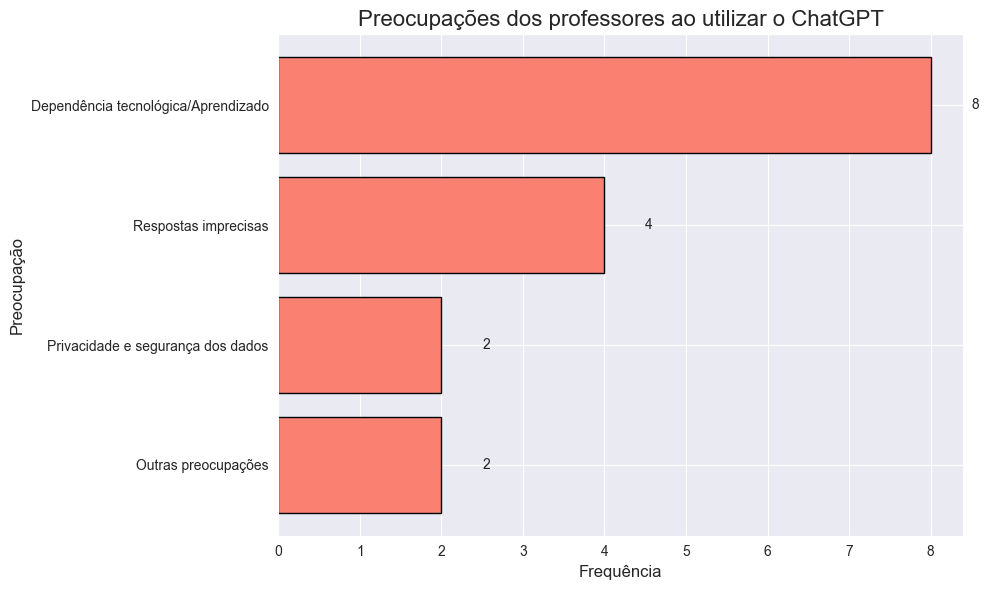

In [48]:
# Passo 1: Pré-processamento
# Remover valores nulos e dividir respostas compostas
concerns = teachers_data['chatgpt_concerns'].dropna().str.split(', ').sum()

# Passo 2: Agrupar em categorias
def categorize_concern(concern):
    concern = concern.lower()
    if "dependência" in concern or "não aprendem" in concern or "substituir" in concern:
        return "Dependência tecnológica/Aprendizado"
    elif "imprecisa" in concern or "erro" in concern or "precisão" in concern:
        return "Respostas imprecisas"
    elif "privacidade" in concern or "segurança" in concern:
        return "Privacidade e segurança dos dados"
    elif "interação" in concern or "humana" in concern:
        return "Falta de interação humana"
    elif "tempo" in concern or "demorado" in concern:
        return "Respostas lentas"
    else:
        return "Outras preocupações"

# Aplicar categorização
categorized_concerns = [categorize_concern(concern) for concern in concerns]

# Passo 3: Contar a frequência das categorias
concerns_counter = Counter(categorized_concerns)

# Criar um DataFrame para visualização
concerns_df = pd.DataFrame(concerns_counter.items(), columns=['Preocupação', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Passo 4: Visualizar os resultados
plt.figure(figsize=(10, 6))
bars = plt.barh(concerns_df['Preocupação'], concerns_df['Frequência'], color='salmon', edgecolor='black')
plt.title('Preocupações dos professores ao utilizar o ChatGPT', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Preocupação', fontsize=12)
plt.gca().invert_yaxis()  # Inverter para que a categoria mais frequente apareça no topo

# Adicionar rótulos com os valores sobre as barras
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), va='center', fontsize=10)

plt.tight_layout()
plt.show()


## 8. Análise dos dados combinados

### 8.1. Nuvem de palavras para os comentários adicionais e sugestões dos estudantes e professores

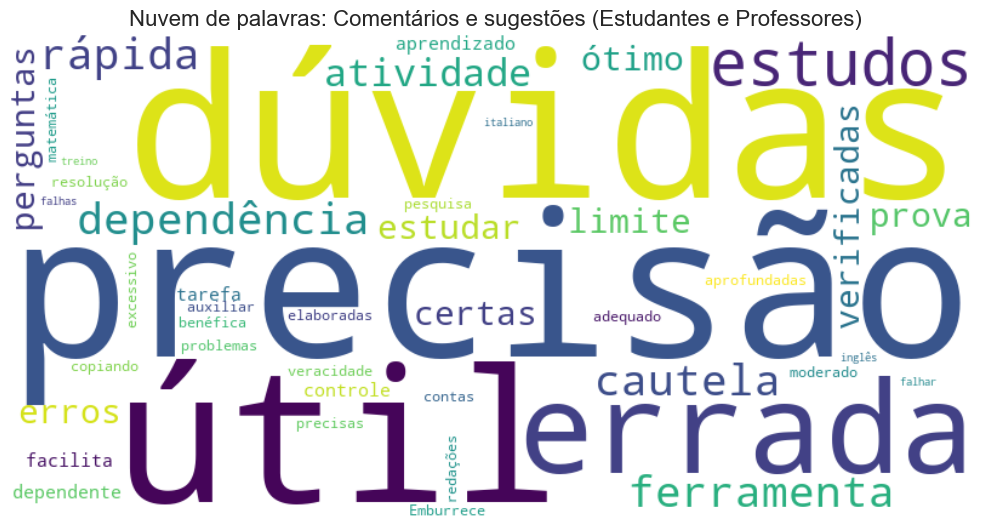

In [49]:
# Combinar as colunas de ambos os datasets
text_columns = ['chatgpt_additional_comments', 'chatgpt_improvement_suggestions']
combined_text_data = pd.concat([
    students_data[text_columns],
    teachers_data[text_columns]
]).fillna('').apply(lambda x: ' '.join(x), axis=1).str.cat(sep=' ')

# Stopwords personalizadas (remover palavras irrelevantes)
custom_stopwords = STOPWORDS.union({
    'de', 'para', 'mais', 'não', 'sim', 'muito', 'ele', 'é', 'nas', 'dos', 'na', 'como', 'porém',
    'além', 'mas', 'apenas', 'seria', 'nada', 'se', 'um', 'uma', 'sou', 'acho', 'não sei',
    'pois', 'bom', 'que', 'são', 'ser', 'nas', 'o', 'os', 'das', 'a', 'e', 'em', 'ao', 'sua', 'já', 'me',
    'chat', 'eu', 'sei', 'ChatGPT', 'sugiro', 'precisa', 'da', 'quando', 'pelo', 'alguma', 'q', 'Nao', 'feito',
    'deve', 'usar', 'uso', 'seu', 'usado', 'entender', 'plataforma', 'por', 'meio', 'aplicativo', 'vida', 'dar', 'utilizo', 'feitos', 'tenho',
    'resposta', 'respostas', 'forma', 'pode', 'menos', 'N', 'ou','informações', 'aluno', 'alunos', 'melhor', 'Eles', 'pequenas', 'gera',
    'acabam', 'responder', 'algumas', 'mesmo', 'fazer', 'escola', 'professores', 'tem', 'tirar', 'corretas', 'vezes', 'gerar', 'conseguir', 'bem', 'maior', 'assim', 'sem', 'parte', 'gpt', 'usuários',
    'Interessante', 'também', 'assunto', 'poderia', 'quanto', 'até', 'sobre', 'nenhuma', 'ganhar', 'somente', 'Livros', 'alguns', 'toda', 'imagens', 'difíceis', 'aulas', 'mesma', 'matéria', 'questões', 'costuma',
    'matérias', 'montar', 'pouco', 'você', 'diferente', 'correto', 'acerto', 'chatgpt', 'nao', 'exercícios', 'trabalhos', 'ensino', 'muitas', 'ter', 'seja', 'muitos', 'utilizada', 'usei', 'nos', 'Penso', 'Melhoria', 'IA', 'desde', 'há',
    'preciso', 'estudo', 'Deveria', 'melhorar', 'educacionais', "maioria"
})

# Gerar a nuvem de palavras refinada
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='viridis',
    max_words=45  # Mostrar no máximo 45 palavras significativas
).generate(combined_text_data)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de palavras: Comentários e sugestões (Estudantes e Professores)', fontsize=16)
plt.tight_layout()
plt.show()

## 8.2. Frequência das palavras para os comentários adicionais e sugestões dos estudantes e professores

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<Figure size 1000x600 with 0 Axes>

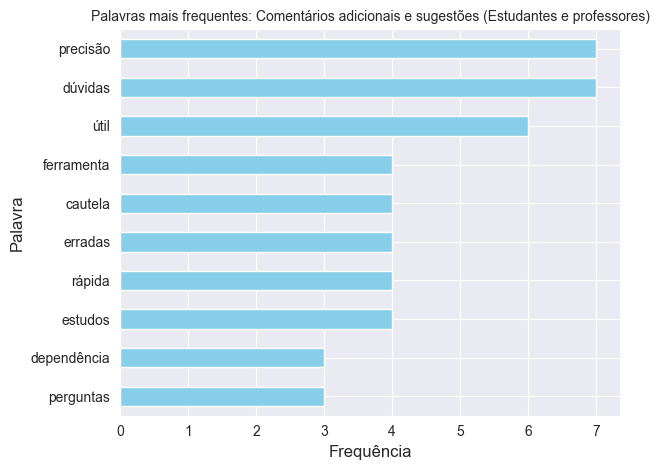

In [50]:
nltk.download('punkt')
nltk.download('punkt_tab')

# Tokenizar o texto e remover stopwords
tokens = [word.lower() for word in word_tokenize(combined_text_data) if word.isalpha() and word.lower() not in custom_stopwords]

# Contar a frequência das palavras
word_counts = Counter(tokens)

# Criar um DataFrame com as palavras mais frequentes
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Palavra', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Plotar gráfico de barras para as palavras mais frequentes
plt.figure(figsize=(10, 6))
word_freq_df.head(10).plot(kind='barh', x='Palavra', y='Frequência', legend=False, color='skyblue')
plt.title('Palavras mais frequentes: Comentários adicionais e sugestões (Estudantes e professores)', fontsize=10)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Palavra', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 9. Conclusão